# KNN Algorithm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [1]:
alunos = pd.read_csv('/content/dataset.csv')
alunos.head()


,ID,IM885,IM853,TN707,TN705,TN706,TN703
0,1,9.6,9.0,9.0,7.4,8.4,7.3
1,2,0.0,1.1,0.0,0.0,0.0,0.0
2,3,9.8,9.7,9.2,9.3,8.7,8.7
3,4,9.0,8.6,7.8,2.9,0.0,7.4
4,5,8.9,9.5,10.0,7.3,8.3,7.7


## Define Grade Mode

This cell allows the user to choose the grading mode during code execution.

1. **Binary:** The "binary" mode converts grades into pass (1) or fail (0)

2. **4groups**: categorizes grades into four performance levels:

* 0 to 2.4 → level 1
* 2.5 to 5 → level 2
* 5 to 7.4 → level 3
* 7.5 to 10 → level 4

The user selects the desired mode, and the function automatically applies the classification to the input grades.

In [54]:
mode = input("Choose grade mode ('binary' ou '4groups'): ")


Choose grade mode ('binary' ou '4groups'): 4groups


In [55]:
def grade_mode(mode):
    def approve_reprove(grade):
        if mode == "binary":
            return 1 if grade >= 5 else 0

        elif mode == "4groups":
            if 0 <= grade < 2.5:
                return 1
            elif 2.5 <= grade < 5:
                return 2
            elif 5 <= grade < 7.5:
                return 3
            elif 7.5 <= grade <= 10:
                return 4
            else:
                raise ValueError("Grade is outside the permitted range (0 to 10).")

        else:
            raise ValueError("Invalid mode. Use 'binary' or '4groups'.")

    return approve_reprove


## Data processing

In [56]:
features = ["IM885", "IM853", "TN707", "TN705", "TN706", "TN703"]
alunos = alunos.dropna(subset=features)
data = alunos[features].copy()

# apply the approve_reprove function to the selected features
data = data.applymap(grade_mode(mode))

display(data)

/tmp/ipython-input-1709991491.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(grade_mode(mode))


,IM885,IM853,TN707,TN705,TN706,TN703
0,4,4,4,3,4,3
1,1,1,1,1,1,1
2,4,4,4,4,4,4
3,4,4,4,2,1,3
4,4,4,4,3,4,4
...,...,...,...,...,...,...
189,1,3,3,2,3,3
190,1,3,4,2,3,4
191,3,3,4,3,4,4
192,1,4,3,1,1,3


In [57]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [58]:
data.head()

,IM885,IM853,TN707,TN705,TN706,TN703
0,4,4,4,3,4,3
1,1,1,1,1,1,1
2,4,4,4,4,4,4
3,4,4,4,2,1,3
4,4,4,4,3,4,4


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [61]:
print(X_train)

[[3 4 3 2 3]
 [1 3 3 2 3]
 [3 3 3 2 1]
 [4 4 4 2 2]
 [3 3 4 2 1]
 [4 4 4 3 3]
 [3 4 3 2 2]
 [4 4 3 2 4]
 [4 4 4 3 3]
 [3 3 3 2 2]
 [4 3 4 1 1]
 [4 4 4 3 3]
 [4 4 4 3 2]
 [2 1 4 3 1]
 [2 3 3 1 3]
 [4 4 3 3 3]
 [4 4 4 3 3]
 [3 3 3 1 2]
 [4 4 4 3 4]
 [4 4 4 3 2]
 [3 3 4 2 2]
 [3 4 4 2 3]
 [4 4 4 2 1]
 [4 3 3 3 3]
 [1 4 3 1 1]
 [2 3 4 2 1]
 [4 4 4 3 2]
 [3 4 4 2 3]
 [3 4 3 2 3]
 [3 4 3 3 4]
 [4 4 4 4 4]
 [3 4 4 3 3]
 [4 4 4 4 4]
 [1 4 4 3 2]
 [3 4 4 3 3]
 [3 4 4 3 3]
 [4 3 4 3 4]
 [4 4 3 3 1]
 [4 3 4 3 2]
 [3 3 4 3 3]
 [4 4 4 3 4]
 [4 4 4 3 3]
 [2 3 3 1 3]
 [1 1 1 1 1]
 [3 3 4 3 3]
 [1 3 4 1 2]
 [4 3 3 2 2]
 [3 3 3 3 1]
 [3 3 4 3 3]
 [3 4 3 2 3]
 [3 3 4 3 2]
 [4 4 4 3 4]
 [3 3 4 1 2]
 [4 4 4 3 3]
 [1 4 4 2 2]
 [3 3 3 3 3]
 [4 4 4 3 4]
 [3 4 3 1 1]
 [1 1 2 1 1]
 [3 4 4 4 3]
 [4 4 4 3 4]
 [3 4 4 4 4]
 [1 1 3 1 1]
 [3 3 4 3 3]
 [4 4 3 3 3]
 [4 3 4 3 3]
 [2 3 4 2 2]
 [3 3 4 3 3]
 [4 4 4 3 3]
 [4 4 4 4 4]
 [2 1 3 1 1]
 [4 4 4 4 4]
 [4 3 4 3 3]
 [3 3 4 2 4]
 [1 3 3 1 3]
 [1 1 2 1 2]
 [4 4 4 4 4]

In [62]:
print(X_test)

[[4 4 4 2 2]
 [3 4 4 3 4]
 [1 2 1 1 2]
 [4 4 4 3 3]
 [4 4 4 3 2]
 [4 4 4 3 3]
 [3 3 1 3 1]
 [3 3 4 1 2]
 [3 3 4 3 4]
 [2 3 1 1 1]
 [4 4 4 3 1]
 [3 4 4 4 3]
 [3 4 4 3 3]
 [4 4 4 4 4]
 [3 3 3 2 1]
 [4 4 4 4 4]
 [3 4 4 3 4]
 [1 3 4 1 3]
 [1 1 4 2 3]
 [3 4 4 3 4]
 [1 1 4 1 1]
 [1 1 4 1 2]
 [3 4 4 3 3]
 [3 3 4 2 2]
 [4 4 4 4 3]
 [3 3 4 3 3]
 [3 3 4 1 1]
 [4 4 4 3 3]
 [4 3 3 3 2]
 [4 4 4 4 4]
 [3 4 4 3 4]
 [4 3 4 2 3]
 [1 1 3 1 1]
 [4 4 4 3 4]
 [3 4 3 3 3]
 [2 3 4 2 3]
 [2 3 3 1 1]
 [3 3 4 2 4]
 [4 1 4 1 1]
 [1 1 1 1 1]
 [3 3 4 3 4]
 [3 3 4 3 2]
 [1 1 1 1 1]
 [2 3 3 1 1]
 [3 3 4 1 2]
 [3 4 3 4 3]
 [2 4 3 2 1]
 [3 3 3 2 3]
 [3 3 4 3 3]
 [3 3 4 3 4]
 [2 2 3 1 1]
 [4 4 3 2 3]
 [3 4 4 2 3]
 [4 4 4 2 3]
 [3 4 4 2 2]
 [4 4 4 4 4]
 [3 4 4 3 3]
 [4 4 4 3 3]
 [3 4 4 3 3]
 [1 1 3 1 3]
 [4 4 4 3 3]
 [4 4 4 3 4]
 [4 3 4 3 3]
 [4 4 4 1 3]
 [4 4 4 3 3]
 [3 4 4 3 4]
 [4 3 4 3 3]
 [3 4 4 3 4]
 [4 4 4 3 3]
 [3 3 4 2 2]
 [3 4 4 3 4]
 [2 3 4 2 2]
 [4 3 4 3 2]
 [3 3 4 4 3]
 [4 4 4 3 3]
 [3 3 4 4 3]
 [3 4 4 3 3]

In [63]:
print(y_test)

[4 4 3 4 3 4 1 3 4 3 4 4 3 3 3 4 4 3 3 4 3 3 4 3 4 4 3 4 3 4 4 4 3 4 4 3 3
 3 4 1 4 3 1 3 3 4 3 3 3 4 4 4 3 4 3 4 3 4 4 3 4 4 3 4 4 4 3 4 3 4 4 4 3 4
 4 3 4 4 3 4 4 4 4 4 3 3 3 3 3 4 3 3 3 3 4 2 3]


In [64]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #avoid data leakage


In [65]:
print(X_train)

[[-0.0695288   0.68775241 -0.80894905 -0.59411963  0.35830126]
 [-1.99646985 -0.46245421 -0.80894905 -0.59411963  0.35830126]
 [-0.0695288  -0.46245421 -0.80894905 -0.59411963 -1.62771145]
 [ 0.89394172  0.68775241  0.64416313 -0.59411963 -0.63470509]
 [-0.0695288  -0.46245421  0.64416313 -0.59411963 -1.62771145]
 [ 0.89394172  0.68775241  0.64416313  0.49323139  0.35830126]
 [-0.0695288   0.68775241 -0.80894905 -0.59411963 -0.63470509]
 [ 0.89394172  0.68775241 -0.80894905 -0.59411963  1.35130762]
 [ 0.89394172  0.68775241  0.64416313  0.49323139  0.35830126]
 [-0.0695288  -0.46245421 -0.80894905 -0.59411963 -0.63470509]
 [ 0.89394172 -0.46245421  0.64416313 -1.68147065 -1.62771145]
 [ 0.89394172  0.68775241  0.64416313  0.49323139  0.35830126]
 [ 0.89394172  0.68775241  0.64416313  0.49323139 -0.63470509]
 [-1.03299933 -2.76286743  0.64416313  0.49323139 -1.62771145]
 [-1.03299933 -0.46245421 -0.80894905 -1.68147065  0.35830126]
 [ 0.89394172  0.68775241 -0.80894905  0.49323139  0.35

In [66]:
print(X_test.dtype)

float64


In [67]:
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]#calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get first k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [68]:
model=KNN(5) #our model
model.fit(X_train,y_train)

5


In [69]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
y_pred = classifier.predict(X_test)

In [71]:
predictions=model.predict(X_test)#our model's predictions

In [72]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 2  0  1  0]
 [ 1  0  0  0]
 [ 2  0 34  8]
 [ 0  0 18 31]]


0.6907216494845361

In [73]:
cm = confusion_matrix(y_test, predictions) #our model
print(cm)
accuracy_score(y_test, predictions)

[[ 2  0  1  0]
 [ 1  0  0  0]
 [ 2  0 31 11]
 [ 0  0 12 37]]


0.7216494845360825

In [82]:

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit the classifier on the PCA-transformed training data
classifier.fit(X_train_pca, y_train)

# Create a meshgrid for the two principal components
X1, X2 = np.meshgrid(
    np.arange(start = X_test_pca[:, 0].min() - 1, stop = X_test_pca[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_test_pca[:, 1].min() - 1, stop = X_test_pca[:, 1].max() + 1, step = 0.01)
)

# Predict on the meshgrid in the PCA space
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)


In [80]:

# Evaluate the scikit-learn KNN model
cm_sklearn = confusion_matrix(y_test, y_pred)
accuracy_sklearn = accuracy_score(y_test, y_pred)

print("Resultados do Modelo scikit-learn KNN:")
print("Matriz de Confusão:")
print(" Legenda:")
print("  [[Verdadeiros Negativos (TN), Falsos Positivos (FP)]")
print("   [Falsos Negativos (FN), Verdadeiros Positivos (TP)]]")
print(cm_sklearn)
print(f"\nTaxa de Acerto (Accuracy Score): {accuracy_sklearn:.4f}")
print(f"Isso significa que o modelo acertou a previsão em {accuracy_sklearn:.2%} dos casos no conjunto de teste.")


print("\n" + "="*40 + "\n") # Separator for clarity

# Evaluate the custom KNN model
cm_custom = confusion_matrix(y_test, predictions)
accuracy_custom = accuracy_score(y_test, predictions)

print("Resultados do Seu Modelo KNN Personalizado:")
print("Matriz de Confusão:")
print(" Legenda:")
print("  [[Verdadeiros Negativos (TN), Falsos Positivos (FP)]")
print("   [Falsos Negativos (FN), Verdadeiros Positivos (TP)]]")
print(cm_custom)
print(f"\nTaxa de Acerto (Accuracy Score): {accuracy_custom:.4f}")
print(f"Isso significa que o modelo acertou a previsão em {accuracy_custom:.2%} dos casos no conjunto de teste.")

Resultados do Modelo scikit-learn KNN:
Matriz de Confusão:
 Legenda:
  [[Verdadeiros Negativos (TN), Falsos Positivos (FP)]
   [Falsos Negativos (FN), Verdadeiros Positivos (TP)]]
[[ 2  0  1  0]
 [ 1  0  0  0]
 [ 2  0 34  8]
 [ 0  0 18 31]]

Taxa de Acerto (Accuracy Score): 0.6907
Isso significa que o modelo acertou a previsão em 69.07% dos casos no conjunto de teste.


Resultados do Seu Modelo KNN Personalizado:
Matriz de Confusão:
 Legenda:
  [[Verdadeiros Negativos (TN), Falsos Positivos (FP)]
   [Falsos Negativos (FN), Verdadeiros Positivos (TP)]]
[[ 2  0  1  0]
 [ 1  0  0  0]
 [ 2  0 31 11]
 [ 0  0 12 37]]

Taxa de Acerto (Accuracy Score): 0.7216
Isso significa que o modelo acertou a previsão em 72.16% dos casos no conjunto de teste.


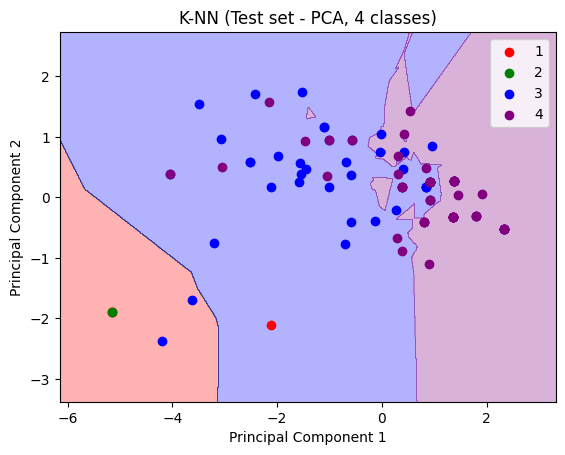

In [83]:
# 4 different collors
colors = ('red', 'green', 'blue', 'purple')
cmap_background = ListedColormap(colors)

X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
)

Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha = 0.3, cmap = cmap_background)

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c = colors[i],
        label = j
    )

plt.title('K-NN (Test set - PCA, 4 classes)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Analisis

In [85]:
np.unique(predictions, return_counts=True)

(array([1, 3, 4]), array([ 5, 44, 48]))

Means that the KNN classifier predicted:

* Class 1 → 5 times
* Class 3 → 44 times
* Class 4 → 48 times
* Class 2 → 0 times

The green area did not appear in the decision boundary plot because the classifier never predicted class 2.

This behavior usually happens when:

* Class 2 has very few samples in the training set, so the model essentially "forgot" about it.

* The chosen value of k makes the neighbors from classes 3 and 4 dominate, absorbing class 2 into their regions.